# 1.資料預處理

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [4]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train_image_4d=x_train_image.reshape(-1,28,28,1).astype('float32')
x_test_image_4d=x_test_image.reshape(-1,28,28,1).astype('float32')

In [6]:
x_train_normalize = x_train_image_4d / 255
x_test_normalize = x_test_image_4d / 255 

In [7]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [8]:
print('Train:',x_train_normalize.shape)
print('Test:',x_test_normalize.shape)

Train: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


In [9]:
print('Train:',y_train_onehot.shape)
print('Test:',y_test_onehot.shape)

Train: (60000, 10)
Test: (10000, 10)


# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [11]:
model = Sequential() 
model.add(Conv2D(
    filters=16,kernel_size=(5,5),padding='same',
    input_shape=(28,28,1),activation='relu',name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(Conv2D(
    filters=36,kernel_size=(5,5),padding='same',
    activation='relu',name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu',name='h1'))
model.add(Dense(10,activation='softmax',name='out'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 16)        416       
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 36)        14436     
                                                                 
 pool2 (MaxPooling2D)        (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0         
                                                                 
 h1 (Dense)                  (None, 128)               225920    
                                                                 
 out (Dense)                 (None, 10)                1

# 訓練模型

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',metrics=['accuracy']) 

In [14]:
#train_history=model.fit(
#    x=x_train_normalize,y=y_train_onehot,
#    validation_split=0.2,batch_size=200,epochs=10,verbose=2)

In [15]:
model.input  

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv1_input')>

In [16]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'out')>

# 評估模型準確率

In [17]:
score=model.evaluate(x_test_normalize , y_test_onehot,verbose=2)

313/313 - 11s - loss: 2.2961 - accuracy: 0.1014 - 11s/epoch - 35ms/step


# 建立輸出特徵圖(Feature Map)的模型

In [18]:
model.layers

In [19]:
DISPLAY_LAYER=4  

In [20]:
model.input  

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv1_input')>

In [21]:
output_layers=[layer.output 
               for layer in model.layers[:DISPLAY_LAYER]]
output_layers

[<KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 14, 14, 16) dtype=float32 (created by layer 'pool1')>,
 <KerasTensor: shape=(None, 14, 14, 36) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 7, 7, 36) dtype=float32 (created by layer 'pool2')>]

In [22]:
from tensorflow.keras import models
feature_map_model= \
   models.Model(
       inputs=model.input,
       outputs=output_layers)

In [23]:
feature_map_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_input (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 16)        416       
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 36)        14436     
                                                                 
 pool2 (MaxPooling2D)        (None, 7, 7, 36)          0         
                                                                 
Total params: 14,852
Trainable params: 14,852
Non-trainable params: 0
_________________________________________________________________


In [24]:
feature_map_model.input  

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv1_input')>

In [25]:
feature_map_model.output  

[<KerasTensor: shape=(None, 28, 28, 16) dtype=float32 (created by layer 'conv1')>,
 <KerasTensor: shape=(None, 14, 14, 16) dtype=float32 (created by layer 'pool1')>,
 <KerasTensor: shape=(None, 14, 14, 36) dtype=float32 (created by layer 'conv2')>,
 <KerasTensor: shape=(None, 7, 7, 36) dtype=float32 (created by layer 'pool2')>]

#預處理要提取特徵圖的影像

In [26]:
import matplotlib.pyplot as plt
def plot_image(image,img_size=1):
    fig = plt.gcf()
    fig.set_size_inches(img_size, img_size)
    plt.imshow(image, cmap='binary')
    plt.xticks([]);plt.yticks([]) 
    plt.show()

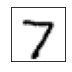

In [27]:
IMG_ID=0
plot_image(x_test_image[IMG_ID]) 

In [28]:
x_test_image[IMG_ID].shape 

(28, 28)

In [29]:
input_4d_img=(x_test_image[IMG_ID]
       .reshape(-1,28,28,1)
       .astype('float32'))/255 

In [30]:
input_4d_img.shape 

(1, 28, 28, 1)

# 產生特徵圖(Feature Map)

訓練前，產生特徵圖

In [31]:
feature_maps = feature_map_model.predict(input_4d_img)

訓練模型

In [32]:
train_history=model.fit(
  x=x_train_normalize,y=y_train_onehot,
  validation_split=0.2,batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 3s - loss: 0.2943 - accuracy: 0.9155 - val_loss: 0.1091 - val_accuracy: 0.9657 - 3s/epoch - 14ms/step
Epoch 2/10
240/240 - 2s - loss: 0.0720 - accuracy: 0.9785 - val_loss: 0.0618 - val_accuracy: 0.9812 - 2s/epoch - 6ms/step
Epoch 3/10
240/240 - 1s - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0537 - val_accuracy: 0.9834 - 1s/epoch - 5ms/step
Epoch 4/10
240/240 - 1s - loss: 0.0390 - accuracy: 0.9873 - val_loss: 0.0448 - val_accuracy: 0.9875 - 1s/epoch - 6ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0419 - val_accuracy: 0.9858 - 1s/epoch - 5ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0399 - val_accuracy: 0.9888 - 1s/epoch - 6ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0409 - val_accuracy: 0.9887 - 1s/epoch - 6ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0442 - val_accuracy: 0.9872 - 1s/epoch - 5ms/step
Epoch 9/10
240/240 - 1s

In [33]:
score=model.evaluate(x_test_normalize , y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0271 - accuracy: 0.9907 - 668ms/epoch - 2ms/step


訓練後，產生特徵圖

In [34]:
feature_maps_trained = feature_map_model.predict(input_4d_img)  

In [35]:
len(feature_maps)

4

產生特徵圖(Feature Map)每一層名稱

In [36]:
layer_names = []
for layer in feature_map_model.layers[1:DISPLAY_LAYER+1]:
    layer_names.append(layer.name)
    print(layer.name) 

conv1
pool1
conv2
pool2


In [37]:
for i in range(len(feature_maps)):
    print('layer',i,' ',
       layer_names[i],':',
       feature_maps[i].shape)

layer 0   conv1 : (1, 28, 28, 16)
layer 1   pool1 : (1, 14, 14, 16)
layer 2   conv2 : (1, 14, 14, 36)
layer 3   pool2 : (1, 7, 7, 36)


In [38]:
feature_maps[0]

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

# 顯示第0層特徵圖影像

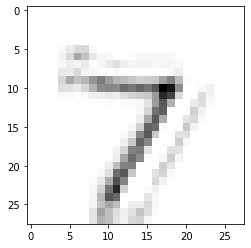

In [39]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 0], cmap='Greys')
plt.show()  

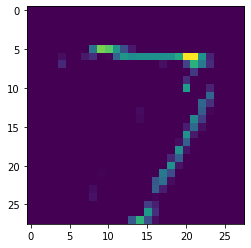

In [40]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 1], cmap='viridis')
plt.show()  

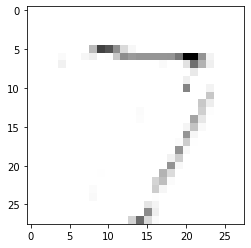

In [41]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 1], cmap='Greys')
plt.show()  

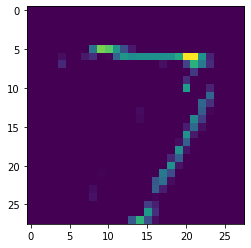

In [42]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[0][0, :, :, 1], cmap='viridis')
plt.show()  

# 顯示第1層特徵圖

In [43]:
layer_names[1]

'pool1'

In [44]:
feature_maps[1].shape

(1, 14, 14, 16)

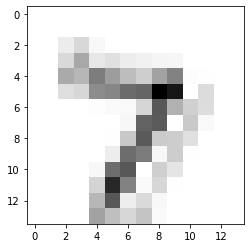

In [45]:
import matplotlib.pyplot as plt
plt.imshow(feature_maps[1][0, :, :, 0], cmap='Greys')
plt.show() 

# 顯示每一層feature_maps

In [46]:
import math
def display_feature_maps(
    feature_maps,layer_names,idx,
    fig_width=10,n_cols=8,p_cmap='Greys'):
   print('layer',idx,layer_names[idx],feature_maps[idx].shape) 
   n_feature_maps = feature_maps[idx].shape[3]
   n_rows = math.ceil(n_feature_maps / n_cols)
   fig = plt.gcf().set_size_inches(fig_width,n_rows*1.2 )
   for i in range(n_feature_maps):
       ax=plt.subplot(n_rows,n_cols, 1+i)
       ax.set_xticks([]);ax.set_yticks([])
       ax.imshow(feature_maps[idx][0, :, :, i],cmap=p_cmap)
   plt.show()

#顯示訓練前後的特徵圖

卷積層1

layer 0 conv1 (1, 28, 28, 16)


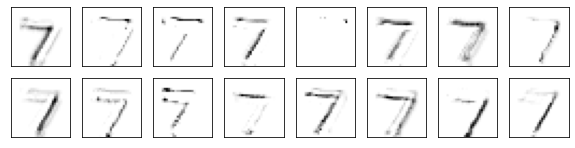

In [47]:
display_feature_maps(feature_maps,layer_names,idx=0)

池化層1

layer 1 pool1 (1, 14, 14, 16)


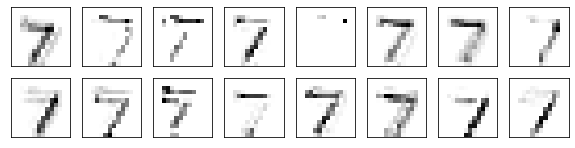

In [48]:
display_feature_maps(feature_maps,layer_names,idx=1)

layer 1 pool1 (1, 14, 14, 16)


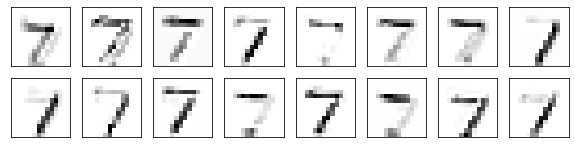

In [49]:
display_feature_maps(feature_maps_trained,layer_names,idx=1)

卷積層2

layer 2 conv2 (1, 14, 14, 36)


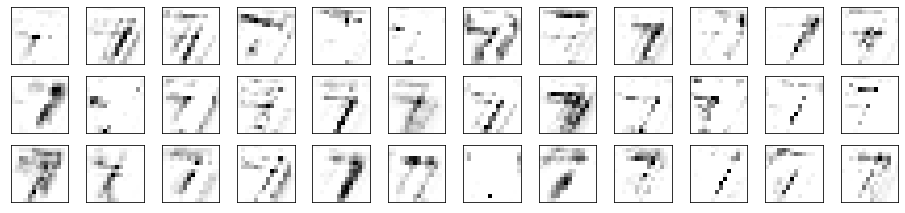

In [50]:
display_feature_maps(feature_maps,layer_names,idx=2,fig_width=16,n_cols=12)                     

layer 2 conv2 (1, 14, 14, 36)


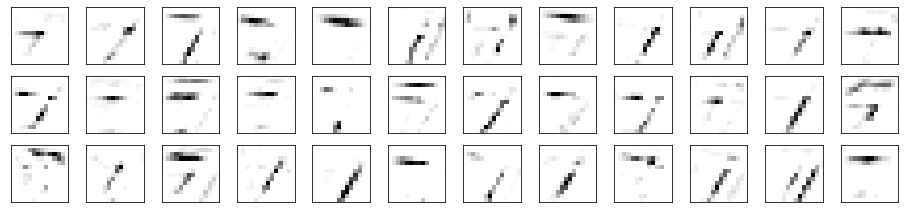

In [51]:
display_feature_maps(feature_maps_trained,layer_names,idx=2,fig_width=16,n_cols=12)  

池化層2

layer 3 pool2 (1, 7, 7, 36)


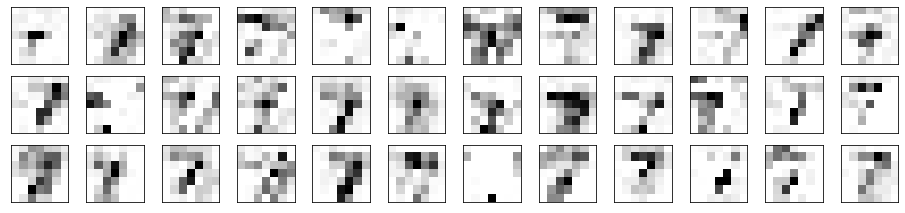

In [52]:
display_feature_maps(feature_maps,layer_names,idx=3,fig_width=16,n_cols=12)

layer 3 pool2 (1, 7, 7, 36)


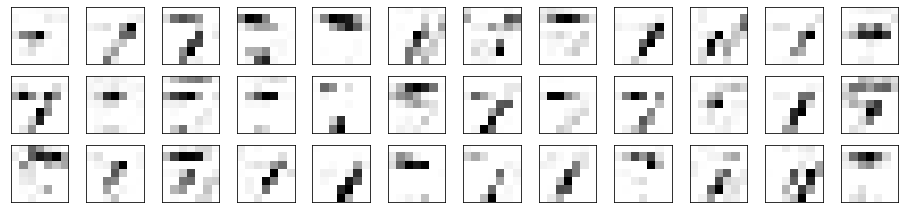

In [53]:
display_feature_maps(feature_maps_trained,layer_names,idx=3,fig_width=16,n_cols=12)